In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_json("http://127.0.0.1:5500/api/v1.0/perthcity")

In [3]:
df

,address,agent,bathrooms,bedrooms,building_size,built_date,car_space,full_address,land_size,lat,lng,postcode,price,property_type,rent,rent_date,sale_id,sold_date,state,suburb
0,1/10 Pendal Lane,not recorded,2,2,90,2003,1,1/10 Pendal Lane Perth WA 6000,96,-31.943275,115.856012,6000,359000,Apartment,470,2010-06,1,2020-08,WA,Perth
1,1/10 Wright Street,not recorded,1,2,62,1979,1,1/10 Wright Street Perth WA 6000,62,-31.940382,115.873713,6000,355000,Townhouse,340,2018-10,2,2020-04,WA,Perth
2,1/308 Stirling Street,Peter Thomas,1,2,59,1965,1,1/308 Stirling Street Perth WA 6000,59,-31.942238,115.869436,6000,325000,Unit,300,2012-04,3,2021-05,WA,Perth
3,1/33 Windsor Street,not recorded,2,2,56,2016,1,1/33 Windsor Street Perth WA 6000,97,-31.944320,115.874520,6000,360000,Apartment,360,2020-03,4,2020-07,WA,Perth
4,1/478 William Street,not recorded,2,2,90,2009,2,1/478 William Street Perth WA 6000,129,-31.941260,115.863844,6000,523000,Apartment,475,2020-07,5,2021-06,WA,Perth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,25/20 Pendal Lane,For Sale By Owner Australia,2,3,161,2003,2,25/20 Pendal Lane Northbridge WA 6003,203,-31.942841,115.856104,6003,724999,Townhouse,590,2018-02,1614,2013-07,WA,Northbridge
1614,21/145 Newcastle Street,Realmark Central - East Perth,2,3,104,2009,1,21/145 Newcastle Street Northbridge WA 6003,151,-31.946895,115.861846,6003,614000,Apartment,0,1900-01,1615,2013-07,WA,Northbridge
1615,18/76 Newcastle Street,Abel Property - Leederville,2,2,88,2007,1,18/76 Newcastle Street Northbridge WA 6003,123,-31.948372,115.866086,6003,535000,Apartment,530,2014-01,1616,2013-07,WA,Northbridge
1616,10/89 Lake Street,BOSS Real Estate - Northbridge,2,3,99,2009,1,10/89 Lake Street Northbridge WA 6003,139,-31.945441,115.857860,6003,590000,Apartment,540,2011-11,1617,2013-06,WA,Northbridge


In [15]:
df['sold_date']= df['sold_date'].astype('datetime64[ns]')
df['sold_year'] = df['sold_date'].dt.strftime('%Y')
df['sold_year'] = df['sold_year'].astype('int')
df['sold_month'] = df['sold_date'].dt.strftime('%m')
df['sold_month'] = df['sold_month'].astype('int')
df

,address,agent,bathrooms,bedrooms,building_size,built_date,car_space,full_address,land_size,lat,...,price,property_type,rent,rent_date,sale_id,sold_date,state,suburb,sold_year,sold_month
0,1/10 Pendal Lane,not recorded,2,2,90,2003,1,1/10 Pendal Lane Perth WA 6000,96,-31.943275,...,359000,Apartment,470,2010-06,1,2020-08-01,WA,Perth,2020,8
1,1/10 Wright Street,not recorded,1,2,62,1979,1,1/10 Wright Street Perth WA 6000,62,-31.940382,...,355000,Townhouse,340,2018-10,2,2020-04-01,WA,Perth,2020,4
2,1/308 Stirling Street,Peter Thomas,1,2,59,1965,1,1/308 Stirling Street Perth WA 6000,59,-31.942238,...,325000,Unit,300,2012-04,3,2021-05-01,WA,Perth,2021,5
3,1/33 Windsor Street,not recorded,2,2,56,2016,1,1/33 Windsor Street Perth WA 6000,97,-31.944320,...,360000,Apartment,360,2020-03,4,2020-07-01,WA,Perth,2020,7
4,1/478 William Street,not recorded,2,2,90,2009,2,1/478 William Street Perth WA 6000,129,-31.941260,...,523000,Apartment,475,2020-07,5,2021-06-01,WA,Perth,2021,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,25/20 Pendal Lane,For Sale By Owner Australia,2,3,161,2003,2,25/20 Pendal Lane Northbridge WA 6003,203,-31.942841,...,724999,Townhouse,590,2018-02,1614,2013-07-01,WA,Northbridge,2013,7
1614,21/145 Newcastle Street,Realmark Central - East Perth,2,3,104,2009,1,21/145 Newcastle Street Northbridge WA 6003,151,-31.946895,...,614000,Apartment,0,1900-01,1615,2013-07-01,WA,Northbridge,2013,7
1615,18/76 Newcastle Street,Abel Property - Leederville,2,2,88,2007,1,18/76 Newcastle Street Northbridge WA 6003,123,-31.948372,...,535000,Apartment,530,2014-01,1616,2013-07-01,WA,Northbridge,2013,7
1616,10/89 Lake Street,BOSS Real Estate - Northbridge,2,3,99,2009,1,10/89 Lake Street Northbridge WA 6003,139,-31.945441,...,590000,Apartment,540,2011-11,1617,2013-06-01,WA,Northbridge,2013,6


In [17]:
grouped_df = df.groupby(['suburb', 'sold_year','sold_month']).agg( count = pd.NamedAgg(column='sale_id',aggfunc='count'),
                                                                   avg_bedroom = pd.NamedAgg(column='bedrooms',aggfunc='mean'),
                                                                   avg_bathroom = pd.NamedAgg(column='bathrooms',aggfunc='mean'),
                                                                   avg_car_space = pd.NamedAgg(column='car_space',aggfunc='mean'),
                                                                   avg_land_size = pd.NamedAgg(column='land_size',aggfunc='mean'),
                                                                   avg_building_size = pd.NamedAgg(column='building_size',aggfunc='mean'),
                                                                   avg_built_year = pd.NamedAgg(column='built_date',aggfunc='mean'),
                                                                   avg_price = pd.NamedAgg(column='price',aggfunc='mean'))
grouped_df = grouped_df.reset_index()
grouped_df

,suburb,sold_year,sold_month,count,avg_bedroom,avg_bathroom,avg_car_space,avg_land_size,avg_building_size,avg_built_year,avg_price
0,Crawley,2013,8,3,2.333333,2.333333,1.666667,270.666667,219.333333,1973.666667,1.660333e+06
1,Crawley,2013,9,4,2.000000,1.500000,1.500000,123.250000,117.500000,1966.250000,7.872500e+05
2,Crawley,2013,10,6,3.000000,1.666667,1.666667,233.500000,139.833333,1986.500000,1.191417e+06
3,Crawley,2013,11,2,2.500000,1.500000,2.000000,205.000000,161.500000,1985.000000,8.385000e+05
4,Crawley,2013,12,4,2.000000,1.250000,1.250000,88.250000,88.750000,1967.750000,6.120000e+05
...,...,...,...,...,...,...,...,...,...,...,...
283,West Perth,2021,4,11,2.000000,1.727273,1.454545,143.090909,90.363636,1989.545455,5.500455e+05
284,West Perth,2021,5,7,1.857143,1.714286,1.142857,111.000000,77.142857,2000.857143,4.588571e+05
285,West Perth,2021,6,11,1.909091,1.545455,1.272727,104.090909,74.909091,1991.363636,4.349091e+05
286,West Perth,2021,7,9,2.444444,1.333333,1.222222,129.555556,88.777778,1995.000000,5.113333e+05


In [18]:
grouped_df.columns

Index(['suburb', 'sold_year', 'sold_month', 'count', 'avg_bedroom',
       'avg_bathroom', 'avg_car_space', 'avg_land_size', 'avg_building_size',
       'avg_built_year', 'avg_price'],
      dtype='object')

In [19]:
grouped_df['perth'] = ''
grouped_df['east_perth'] = ''
grouped_df['west_perth'] = ''
grouped_df['northbridge'] = ''
grouped_df['crawley'] = ''
grouped_df['nedlands'] = ''

In [21]:
for i in range(0,len(grouped_df['count'])):
    if grouped_df.iloc[i,0] =='Perth':
        grouped_df.iloc[i,11] = 1
        grouped_df.iloc[i,12:17] = 0
    elif grouped_df.iloc[i,0] =='East Perth':
        grouped_df.iloc[i,12] = 1
        grouped_df.iloc[i,11] = 0
        grouped_df.iloc[i,12:17] = 0
    elif grouped_df.iloc[i,0] =='West Perth':
        grouped_df.iloc[i,13] = 1
        grouped_df.iloc[i,11:13] = 0
        grouped_df.iloc[i,14:17] = 0
    elif grouped_df.iloc[i,0] =='Northbridge':
        grouped_df.iloc[i,14] = 1
        grouped_df.iloc[i,11:14] = 0
        grouped_df.iloc[i,15:17] = 0
    elif grouped_df.iloc[i,0] =='Crawley':
        grouped_df.iloc[i,15] = 1
        grouped_df.iloc[i,11:15] = 0
        grouped_df.iloc[i,16] = 0
    elif grouped_df.iloc[i,0] =='Nedlands':
        grouped_df.iloc[i,16] = 1
        grouped_df.iloc[i,11:16] = 0
grouped_df

,suburb,sold_year,sold_month,count,avg_bedroom,avg_bathroom,avg_car_space,avg_land_size,avg_building_size,avg_built_year,avg_price,perth,east_perth,west_perth,northbridge,crawley,nedlands
0,Crawley,2013,8,3,2.333333,2.333333,1.666667,270.666667,219.333333,1973.666667,1.660333e+06,0,0,0,0,1,0
1,Crawley,2013,9,4,2.000000,1.500000,1.500000,123.250000,117.500000,1966.250000,7.872500e+05,0,0,0,0,1,0
2,Crawley,2013,10,6,3.000000,1.666667,1.666667,233.500000,139.833333,1986.500000,1.191417e+06,0,0,0,0,1,0
3,Crawley,2013,11,2,2.500000,1.500000,2.000000,205.000000,161.500000,1985.000000,8.385000e+05,0,0,0,0,1,0
4,Crawley,2013,12,4,2.000000,1.250000,1.250000,88.250000,88.750000,1967.750000,6.120000e+05,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,West Perth,2021,4,11,2.000000,1.727273,1.454545,143.090909,90.363636,1989.545455,5.500455e+05,0,0,1,0,0,0
284,West Perth,2021,5,7,1.857143,1.714286,1.142857,111.000000,77.142857,2000.857143,4.588571e+05,0,0,1,0,0,0
285,West Perth,2021,6,11,1.909091,1.545455,1.272727,104.090909,74.909091,1991.363636,4.349091e+05,0,0,1,0,0,0
286,West Perth,2021,7,9,2.444444,1.333333,1.222222,129.555556,88.777778,1995.000000,5.113333e+05,0,0,1,0,0,0


In [28]:
grouped_df.to_csv('static/data/AvgSale.csv')

In [23]:
# Assign the data to X and y
X = grouped_df[["perth", "west_perth", "east_perth", "northbridge", "crawley", "nedlands", "sold_year" ,"sold_month","count",
           "avg_bedroom", "avg_bathroom", "avg_car_space", "avg_land_size", "avg_building_size", "avg_built_year" ]]
y = grouped_df["avg_price"].values.reshape(-1, 1)
print(X.shape, y.shape)

(288, 15) (288, 1)


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [25]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [26]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [29]:
# Create the model using LinearRegression

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

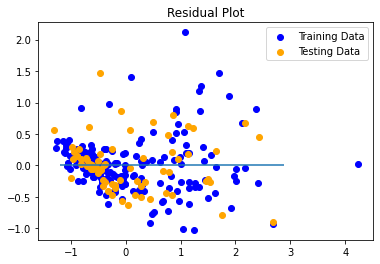

In [30]:
# Make predictions using a fitted model
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), y_train_scaled - model.predict(X_train_scaled), c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), y_test_scaled - model.predict(X_test_scaled), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [31]:
#compare actual output values with predicted values
df1 = X_test
df1['Actual'] = y_test.reshape(1,-1)[0]
df1['Linear_Regression_Predicted'] = y_scaler.inverse_transform(model.predict(X_test_scaled))
df1.head(10)

<ipython-input-31-74e79293dd89>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Actual'] = y_test.reshape(1,-1)[0]
<ipython-input-31-74e79293dd89>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Linear_Regression_Predicted'] = y_scaler.inverse_transform(model.predict(X_test_scaled))


,perth,west_perth,east_perth,northbridge,crawley,nedlands,sold_year,sold_month,count,avg_bedroom,avg_bathroom,avg_car_space,avg_land_size,avg_building_size,avg_built_year,Actual,Linear_Regression_Predicted
201,0,0,0,1,0,0,2018,4,3,2.000000,1.333333,1.000000,116.000000,85.333333,1999.000000,4.093333e+05,3.957726e+05
282,0,1,0,0,0,0,2021,3,17,2.176471,1.470588,1.411765,135.352941,85.352941,1996.058824,5.344412e+05,5.697795e+05
263,0,1,0,0,0,0,2019,8,4,2.500000,1.750000,1.250000,121.250000,81.000000,2007.500000,4.750000e+05,5.884371e+05
125,0,0,0,0,0,1,2019,12,5,4.200000,3.000000,2.400000,852.400000,290.200000,1959.800000,2.163000e+06,1.946613e+06
31,0,0,0,0,1,0,2016,4,3,1.666667,1.333333,1.000000,102.333333,90.000000,1962.333333,5.310000e+05,6.702206e+05
126,0,0,0,0,0,1,2020,1,9,3.888889,2.222222,1.888889,813.555556,207.555556,1945.888889,1.682228e+06,1.571413e+06
245,1,0,0,0,0,0,2021,2,14,1.928571,1.500000,1.142857,192.857143,86.785714,2002.928571,5.130714e+05,5.250328e+05
138,0,0,0,0,0,1,2021,1,3,4.000000,2.000000,2.666667,795.000000,274.666667,1966.333333,2.150000e+06,1.831005e+06
112,0,0,0,0,0,1,2018,11,6,2.833333,1.666667,2.000000,571.833333,250.166667,1990.500000,1.401667e+06,1.507879e+06
190,0,0,0,1,0,0,2017,5,3,2.333333,1.666667,1.333333,125.000000,91.666667,2006.333333,4.853333e+05,5.433589e+05


In [32]:
# Fit the model to the training data and calculate the scores for the training and testing data

training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8357498175582428
Testing Score: 0.8118641862752212


In [33]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.16759467002738943, R2: 0.8118641862752212


# LASSO model

In [34]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso


lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

lasso_predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, lasso_predictions) #error to a model (closer to 0 the better)
r2 = lasso.score(X_test_scaled, y_test_scaled) #nearer to 1 the better

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.1588675532550334, R2: 0.8216609370619259


In [37]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

param_grid = dict(alpha=alpha)

lasso_grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)

lasso_grid_result = lasso_grid.fit(X_train_scaled, y_train_scaled)

# lasso_grid_predictions = lasso_grid_model(X_test_scaled)

# MSE = mean_squared_error(y_test_scaled, lasso_grid_predictions) #error to a model (closer to 0 the better)
# r2 = lasso_grid_model.score(X_test_scaled, y_test_scaled) #nearer to 1 the better

# print(f"MSE: {MSE}, R2: {r2}")
print('Best Score: ', lasso_grid_result.best_score_)
print('Best Params: ', lasso_grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.7806677124315047
Best Params:  {'alpha': 0.01}


In [38]:
best_lasso = Lasso(alpha=0.01).fit(X_train_scaled, y_train_scaled)

best_lasso_predictions = best_lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, best_lasso_predictions)
r2 = best_lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.1588675532550334, R2: 0.8216609370619259


In [39]:
df1['Lasso_Predicted'] = y_scaler.inverse_transform(best_lasso.predict(X_test_scaled))
df1.head(10)

<ipython-input-39-96dcefbde04c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Lasso_Predicted'] = y_scaler.inverse_transform(best_lasso.predict(X_test_scaled))


,perth,west_perth,east_perth,northbridge,crawley,nedlands,sold_year,sold_month,count,avg_bedroom,avg_bathroom,avg_car_space,avg_land_size,avg_building_size,avg_built_year,Actual,Linear_Regression_Predicted,Lasso_Predicted
201,0,0,0,1,0,0,2018,4,3,2.000000,1.333333,1.000000,116.000000,85.333333,1999.000000,4.093333e+05,3.957726e+05,4.154611e+05
282,0,1,0,0,0,0,2021,3,17,2.176471,1.470588,1.411765,135.352941,85.352941,1996.058824,5.344412e+05,5.697795e+05,5.481695e+05
263,0,1,0,0,0,0,2019,8,4,2.500000,1.750000,1.250000,121.250000,81.000000,2007.500000,4.750000e+05,5.884371e+05,5.777985e+05
125,0,0,0,0,0,1,2019,12,5,4.200000,3.000000,2.400000,852.400000,290.200000,1959.800000,2.163000e+06,1.946613e+06,1.959953e+06
31,0,0,0,0,1,0,2016,4,3,1.666667,1.333333,1.000000,102.333333,90.000000,1962.333333,5.310000e+05,6.702206e+05,6.713889e+05
126,0,0,0,0,0,1,2020,1,9,3.888889,2.222222,1.888889,813.555556,207.555556,1945.888889,1.682228e+06,1.571413e+06,1.573268e+06
245,1,0,0,0,0,0,2021,2,14,1.928571,1.500000,1.142857,192.857143,86.785714,2002.928571,5.130714e+05,5.250328e+05,5.161439e+05
138,0,0,0,0,0,1,2021,1,3,4.000000,2.000000,2.666667,795.000000,274.666667,1966.333333,2.150000e+06,1.831005e+06,1.834505e+06
112,0,0,0,0,0,1,2018,11,6,2.833333,1.666667,2.000000,571.833333,250.166667,1990.500000,1.401667e+06,1.507879e+06,1.470656e+06
190,0,0,0,1,0,0,2017,5,3,2.333333,1.666667,1.333333,125.000000,91.666667,2006.333333,4.853333e+05,5.433589e+05,5.482086e+05


# Ridge model

In [40]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge


ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

ridge_predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, ridge_predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.167587642991614, R2: 0.8118720745755679


In [41]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

param_grid = dict(alpha=alpha)

ridge_grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)

ridge_grid_result = ridge_grid.fit(X_train_scaled, y_train_scaled)

# ridge_grid_predictions = ridge_grid(X_test_scaled)

# MSE = mean_squared_error(y_test_scaled, ridge_grid_predictions) #error to a model (closer to 0 the better)
# r2 = ridge_grid.score(X_test_scaled, y_test_scaled) #nearer to 1 the better

# print(f"MSE: {MSE}, R2: {r2}")
print('Best Score: ', ridge_grid_result.best_score_)
print('Best Params: ', ridge_grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.7847737804184284
Best Params:  {'alpha': 100}


In [42]:
best_ridge = Ridge(alpha=100).fit(X_train_scaled, y_train_scaled)

best_ridge_predictions = best_ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, best_ridge_predictions)
r2 = best_ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.16459394120997037, R2: 0.8152326976827752


In [43]:
df1['Ridge_Predicted'] = y_scaler.inverse_transform(best_ridge.predict(X_test_scaled))
df1.head(10)

<ipython-input-43-4ab57f1676a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Ridge_Predicted'] = y_scaler.inverse_transform(best_ridge.predict(X_test_scaled))


,perth,west_perth,east_perth,northbridge,crawley,nedlands,sold_year,sold_month,count,avg_bedroom,avg_bathroom,avg_car_space,avg_land_size,avg_building_size,avg_built_year,Actual,Linear_Regression_Predicted,Lasso_Predicted,Ridge_Predicted
201,0,0,0,1,0,0,2018,4,3,2.000000,1.333333,1.000000,116.000000,85.333333,1999.000000,4.093333e+05,3.957726e+05,4.154611e+05,4.490404e+05
282,0,1,0,0,0,0,2021,3,17,2.176471,1.470588,1.411765,135.352941,85.352941,1996.058824,5.344412e+05,5.697795e+05,5.481695e+05,5.476157e+05
263,0,1,0,0,0,0,2019,8,4,2.500000,1.750000,1.250000,121.250000,81.000000,2007.500000,4.750000e+05,5.884371e+05,5.777985e+05,5.910501e+05
125,0,0,0,0,0,1,2019,12,5,4.200000,3.000000,2.400000,852.400000,290.200000,1959.800000,2.163000e+06,1.946613e+06,1.959953e+06,1.856984e+06
31,0,0,0,0,1,0,2016,4,3,1.666667,1.333333,1.000000,102.333333,90.000000,1962.333333,5.310000e+05,6.702206e+05,6.713889e+05,6.642841e+05
126,0,0,0,0,0,1,2020,1,9,3.888889,2.222222,1.888889,813.555556,207.555556,1945.888889,1.682228e+06,1.571413e+06,1.573268e+06,1.538712e+06
245,1,0,0,0,0,0,2021,2,14,1.928571,1.500000,1.142857,192.857143,86.785714,2002.928571,5.130714e+05,5.250328e+05,5.161439e+05,5.196997e+05
138,0,0,0,0,0,1,2021,1,3,4.000000,2.000000,2.666667,795.000000,274.666667,1966.333333,2.150000e+06,1.831005e+06,1.834505e+06,1.739174e+06
112,0,0,0,0,0,1,2018,11,6,2.833333,1.666667,2.000000,571.833333,250.166667,1990.500000,1.401667e+06,1.507879e+06,1.470656e+06,1.333239e+06
190,0,0,0,1,0,0,2017,5,3,2.333333,1.666667,1.333333,125.000000,91.666667,2006.333333,4.853333e+05,5.433589e+05,5.482086e+05,5.885335e+05


# ElasticNet model

In [44]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

elas_predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, elas_predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.16239746528280236, R2: 0.8176983834102336


In [45]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

param_grid = dict(alpha=alpha)

elasticnet_grid = GridSearchCV(estimator=elasticnet, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)

elasticnet_grid_result= elasticnet_grid.fit(X_train_scaled, y_train_scaled)

# elasticnet_grid_predictions = elasticnet_grid(X_test_scaled)

# MSE = mean_squared_error(y_test_scaled, elasticnet_grid_predictions) #error to a model (closer to 0 the better)
# r2 = elasticnet_grid.score(X_test_scaled, y_test_scaled) #nearer to 1 the better

# print(f"MSE: {MSE}, R2: {r2}")
print('Best Score: ', elasticnet_grid_result.best_score_)
print('Best Params: ', elasticnet_grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.7941099066000398
Best Params:  {'alpha': 0.1}


In [46]:
best_elasticnet = Ridge(alpha=0.1).fit(X_train_scaled, y_train_scaled)

best_elasticnet_predictions = best_elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, best_ridge_predictions)
r2 = best_elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.16459394120997037, R2: 0.8119423597390993


In [47]:
df1['elasticnet_Predicted'] = y_scaler.inverse_transform(best_elasticnet.predict(X_test_scaled))
df1.head(10)

<ipython-input-47-30feeaf9fe4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['elasticnet_Predicted'] = y_scaler.inverse_transform(best_elasticnet.predict(X_test_scaled))


,perth,west_perth,east_perth,northbridge,crawley,nedlands,sold_year,sold_month,count,avg_bedroom,avg_bathroom,avg_car_space,avg_land_size,avg_building_size,avg_built_year,Actual,Linear_Regression_Predicted,Lasso_Predicted,Ridge_Predicted,elasticnet_Predicted
201,0,0,0,1,0,0,2018,4,3,2.000000,1.333333,1.000000,116.000000,85.333333,1999.000000,4.093333e+05,3.957726e+05,4.154611e+05,4.490404e+05,3.957747e+05
282,0,1,0,0,0,0,2021,3,17,2.176471,1.470588,1.411765,135.352941,85.352941,1996.058824,5.344412e+05,5.697795e+05,5.481695e+05,5.476157e+05,5.691446e+05
263,0,1,0,0,0,0,2019,8,4,2.500000,1.750000,1.250000,121.250000,81.000000,2007.500000,4.750000e+05,5.884371e+05,5.777985e+05,5.910501e+05,5.884291e+05
125,0,0,0,0,0,1,2019,12,5,4.200000,3.000000,2.400000,852.400000,290.200000,1959.800000,2.163000e+06,1.946613e+06,1.959953e+06,1.856984e+06,1.946698e+06
31,0,0,0,0,1,0,2016,4,3,1.666667,1.333333,1.000000,102.333333,90.000000,1962.333333,5.310000e+05,6.702206e+05,6.713889e+05,6.642841e+05,6.702738e+05
126,0,0,0,0,0,1,2020,1,9,3.888889,2.222222,1.888889,813.555556,207.555556,1945.888889,1.682228e+06,1.571413e+06,1.573268e+06,1.538712e+06,1.571458e+06
245,1,0,0,0,0,0,2021,2,14,1.928571,1.500000,1.142857,192.857143,86.785714,2002.928571,5.130714e+05,5.250328e+05,5.161439e+05,5.196997e+05,5.248613e+05
138,0,0,0,0,0,1,2021,1,3,4.000000,2.000000,2.666667,795.000000,274.666667,1966.333333,2.150000e+06,1.831005e+06,1.834505e+06,1.739174e+06,1.831007e+06
112,0,0,0,0,0,1,2018,11,6,2.833333,1.666667,2.000000,571.833333,250.166667,1990.500000,1.401667e+06,1.507879e+06,1.470656e+06,1.333239e+06,1.507205e+06
190,0,0,0,1,0,0,2017,5,3,2.333333,1.666667,1.333333,125.000000,91.666667,2006.333333,4.853333e+05,5.433589e+05,5.482086e+05,5.885335e+05,5.433862e+05


# Save the best Model

In [48]:
import joblib
joblib.dump(best_lasso, "best_AVG_model.pkl")

['best_AVG_model.pkl']

In [49]:
my_model = joblib.load("best_AVG_model.pkl")

In [ ]:
y_pred = my_model.predict(X_test_scaled)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test_scaled, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test_scaled, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_scaled, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test_scaled,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test_scaled,y_pred)
# Perfect predictions
plt.plot(y_test_scaled,y_test_scaled,'r')